In [382]:
#We import the libraries we need
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [383]:
#We read the file we parsed and put it into a dataframe
df_data = pd.read_csv("missionFileunsupervised.csv")

In [384]:
#We take a look at what's inside the dataframe
df_data

,sentence,cluster
0,program focus ols modern data optimization lea...,0
1,central goal program build system coherent man...,0
2,certificate data science prepare student analy...,0
3,graduate certificate analytics university ’ s ...,0
4,master science apply statistic data masda degr...,0
...,...,...
635,context medical school health graduate school ...,0
636,rapidly frontier m analytics degree program pr...,0
637,program ohio prepare confidently help leader m...,0
638,learn r language technology analyze build pred...,0


In [385]:
#We look at the details of the dataframe
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 2 columns):
sentence    640 non-null object
cluster     640 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [386]:
#We drop any rows that have NaN values
df_data.dropna(axis = 0)

,sentence,cluster
0,program focus ols modern data optimization lea...,0
1,central goal program build system coherent man...,0
2,certificate data science prepare student analy...,0
3,graduate certificate analytics university ’ s ...,0
4,master science apply statistic data masda degr...,0
...,...,...
635,context medical school health graduate school ...,0
636,rapidly frontier m analytics degree program pr...,0
637,program ohio prepare confidently help leader m...,0
638,learn r language technology analyze build pred...,0


In [387]:
#We delete the placeholder cluster column for now cause we will substitute it soon
del df_data['cluster']

In [388]:
#We look at the data without the cluster column
df_data

,sentence
0,program focus ols modern data optimization lea...
1,central goal program build system coherent man...
2,certificate data science prepare student analy...
3,graduate certificate analytics university ’ s ...
4,master science apply statistic data masda degr...
...,...
635,context medical school health graduate school ...
636,rapidly frontier m analytics degree program pr...
637,program ohio prepare confidently help leader m...
638,learn r language technology analyze build pred...


In [389]:
#We import some machine learning algorithms and store the values of the sentences
from sklearn.feature_extraction.text import TfidfVectorizer as tk
from sklearn.cluster import KMeans
sentences = df_data['sentence'].values

In [390]:
#We transform the features of the sentences into their numeric format to be able to process them 
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(sentences)

In [391]:
#We transform the sentences into their numeric format to be able to process them 
#In this case I did it directly, but we could explore with the train_test_split method also
text = df_data['sentence']
#X_train, X_test, y_train, y_test = train_test_split(text, text, test_size=0.4, random_state=1)
vect = CountVectorizer()
X_train = vect.fit_transform(text)
X_test = vect.transform(text)

In [186]:
#Elbow Method
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_test)
    #inertia is referring to the total sum of squares of a cluster
    distortions.append(kmeanModel.inertia_)

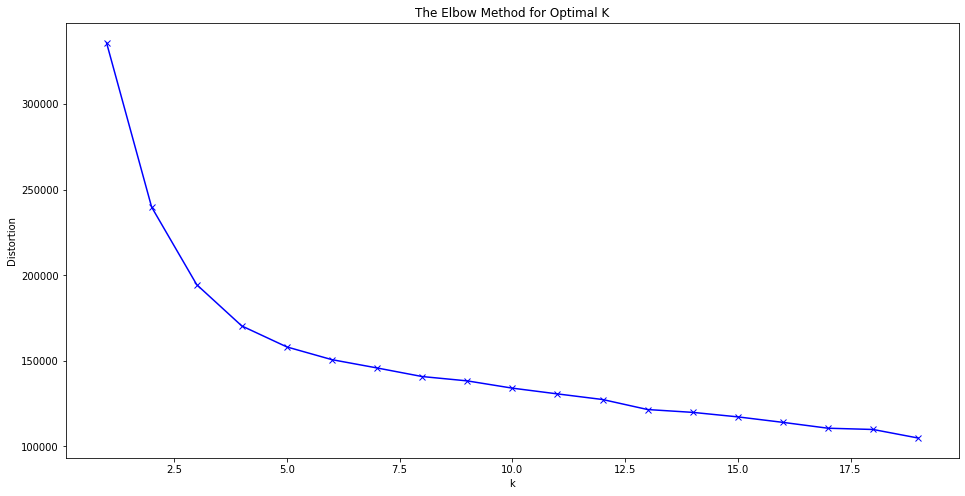

In [187]:
#We plot the behaviour of the distortion in relation to the K values to see which is the optimal k
plt.figure(figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method for Optimal K')
plt.show()

In [392]:
#We establish the k value and run/fit the features to the KMeans model
k = 5
model = KMeans(n_clusters=k, init = 'k-means++', max_iter=100, n_init = 1)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [393]:
#We attach the labels of the clustering to each one of the sentences
df_data['cluster'] = model.labels_

In [394]:
#We take a look at the dataframe again
df_data

,sentence,cluster
0,program focus ols modern data optimization lea...,1
1,central goal program build system coherent man...,4
2,certificate data science prepare student analy...,2
3,graduate certificate analytics university ’ s ...,4
4,master science apply statistic data masda degr...,0
...,...,...
635,context medical school health graduate school ...,3
636,rapidly frontier m analytics degree program pr...,4
637,program ohio prepare confidently help leader m...,4
638,learn r language technology analyze build pred...,4


In [363]:
#Here we make a quick script to make a file for each cluster containing the sentences belonging to that cluster
clusters = df_data.groupby('cluster')
for cluster in clusters.groups:
    #create the csv file
    f=open('cluster' + str(cluster)+ '.csv', 'w')
    data = clusters.get_group(cluster)[['sentence']]
    f.write(data.to_csv(index_label='id'))
    f.close()

In [395]:
#We get the center of gravity of each cluster and print them out, ino ther words their main features
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
     #10 features per cluster, but this value can be changed
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j])
    print("----------------")

Cluster centroids: 

Cluster 0:
 statistical
 analysis
 statistic
 data
 method
 program
 student
 apply
 department
 graduate
----------------
Cluster 1:
 problem
 solve
 apply
 complex
 analytical
 data
 science
 teach
 computational
 implement
----------------
Cluster 2:
 science
 data
 program
 student
 master
 skill
 provide
 degree
 field
 prepare
----------------
Cluster 3:
 management
 health
 technology
 skill
 system
 provide
 student
 program
 career
 design
----------------
Cluster 4:
 data
 program
 analytics
 certificate
 student
 decision
 graduate
 sight
 make
 design
----------------


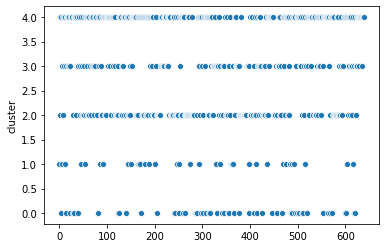

In [396]:
#We plot the how each sentence go clustered based on their index 
sns.scatterplot(x=df_data.index.values, y='cluster', data=df_data)